In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
# import COCO
from pycocotools.coco import COCO

In [2]:
!nvidia-smi

Thu Oct  3 17:57:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install -q ultralytics roboflow opencv-python matplotlib pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.7/881.7 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Training

In [7]:
import os
# print the current working directory
print(os.getcwd())

/content


In [8]:
os.chdir("/content/drive/MyDrive/adl-tennis-copy/roboflow_ds")

In [11]:
!curl -L "https://app.roboflow.com/ds/b1abYHqtGk?key=zXOOG9Dayo" > roboflow.zip
!unzip roboflow.zip
!rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2900      0 --:--:-- --:--:-- --:--:--  2903
100 20.1M  100 20.1M    0     0  15.0M      0  0:00:01  0:00:01 --:--:-- 46.3M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/frame_142_jpg.rf.ac0418af209c04dc99d44ee9f1a737aa.jpg  
 extracting: test/images/frame_19_jpg.rf.92059e7800df401303a0b6d8941c9a8c.jpg  
 extracting: test/images/frame_1_jpg.rf.6e2f3977dc235ade0aa5fc79d5c4ca87.jpg  
 extracting: test/images/frame_39_jpg.rf.aac6afd5922e7090805769be217d433a.jpg  
 extracting: test/images/frame_46_jpg.rf.637f613f10d84d5e697eedca20b6441f.jpg  
 extracting: test/images/frame_5_jpg.rf.799430d04d8d3c8a4d0a5a9cafec9223.jpg  
 extracting: test/image

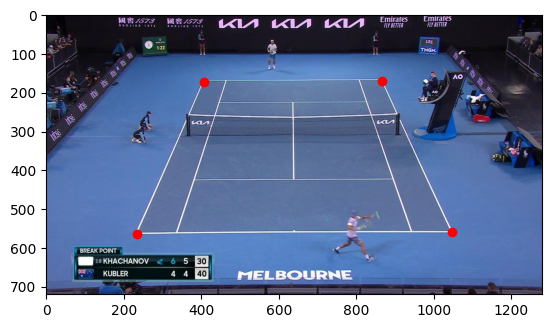

In [12]:
image_path = "/content/drive/MyDrive/adl-tennis-copy/roboflow_ds/test/images/frame_142_jpg.rf.ac0418af209c04dc99d44ee9f1a737aa.jpg"
ann_path = "/content/drive/MyDrive/adl-tennis-copy/roboflow_ds/test/labels/frame_142_jpg.rf.ac0418af209c04dc99d44ee9f1a737aa.txt"

image = Image.open(image_path)

with open(ann_path, 'r') as f:
    lines = f.readlines()

keypoints = lines[0].split()[5:]

# convert to (x, y, v) format
keypoints = [(float(keypoints[i]), float(keypoints[i+1]), int(keypoints[i+2])) for i in range(0, len(keypoints), 3)]

plt.imshow(image)

width, height = image.size

for keypoint in keypoints:
    x, y, v = keypoint
    if v == 2:
        plt.scatter(x * width, y * height, color='red')

plt.show()

In [13]:
!sed -i 's|\(train: \).*|\1../train/images|' /content/drive/MyDrive/adl-tennis-copy/roboflow_ds/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' /content/drive/MyDrive/adl-tennis-copy/roboflow_ds/data.yaml
!sed -i 's|\(test: \).*|\1../test/images|' /content/drive/MyDrive/adl-tennis-copy/roboflow_ds/data.yaml

In [17]:
%cd {HOME}

!yolo task=pose mode=train model=yolov8x-pose.pt data=/content/drive/MyDrive/adl-tennis-copy/roboflow_ds/data.yaml batch=16 epochs=50 imgsz=640 mosaic=0.0 plots=True

/content
Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8x-pose.pt, data=/content/drive/MyDrive/adl-tennis-copy/roboflow_ds/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

In [18]:
!ls {HOME}/runs/pose/train/

args.yaml					    labels_correlogram.jpg  weights
events.out.tfevents.1727979054.0391e0bca551.4481.0  labels.jpg


In [19]:
from IPython.display import Image

/content


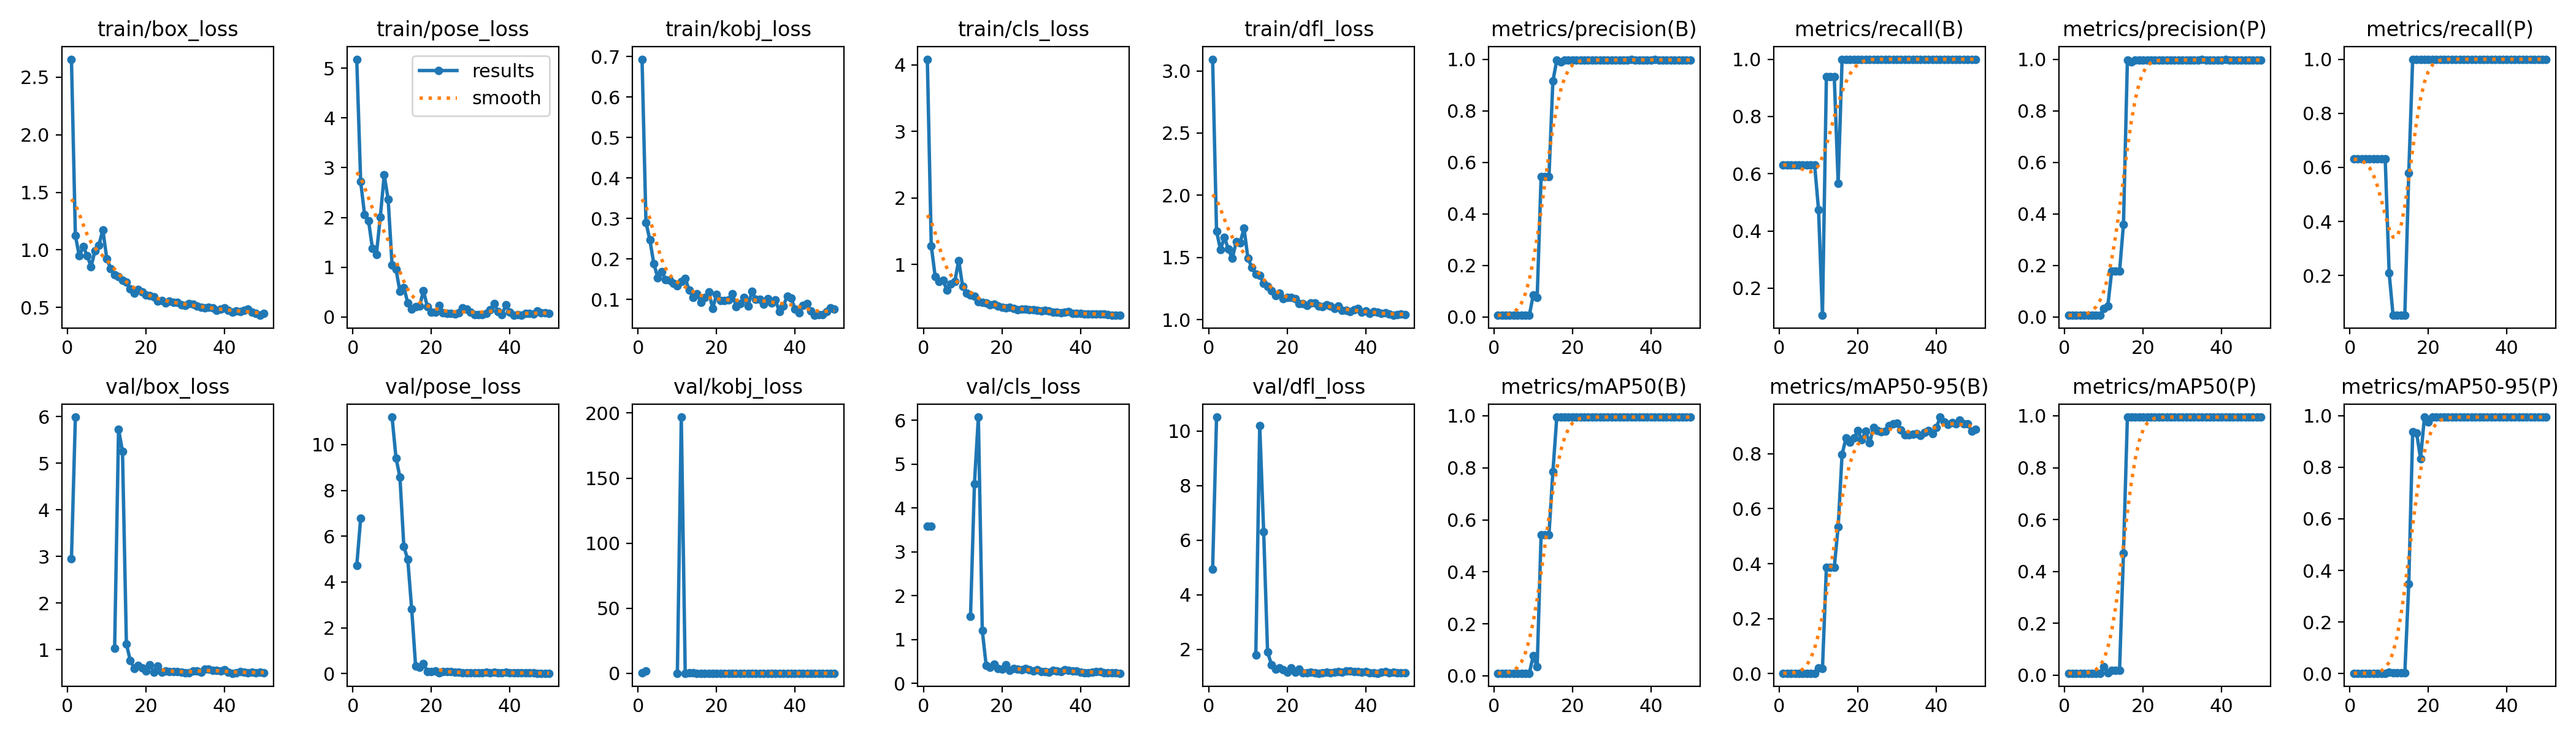

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train3/results.png', width=1000)

/content


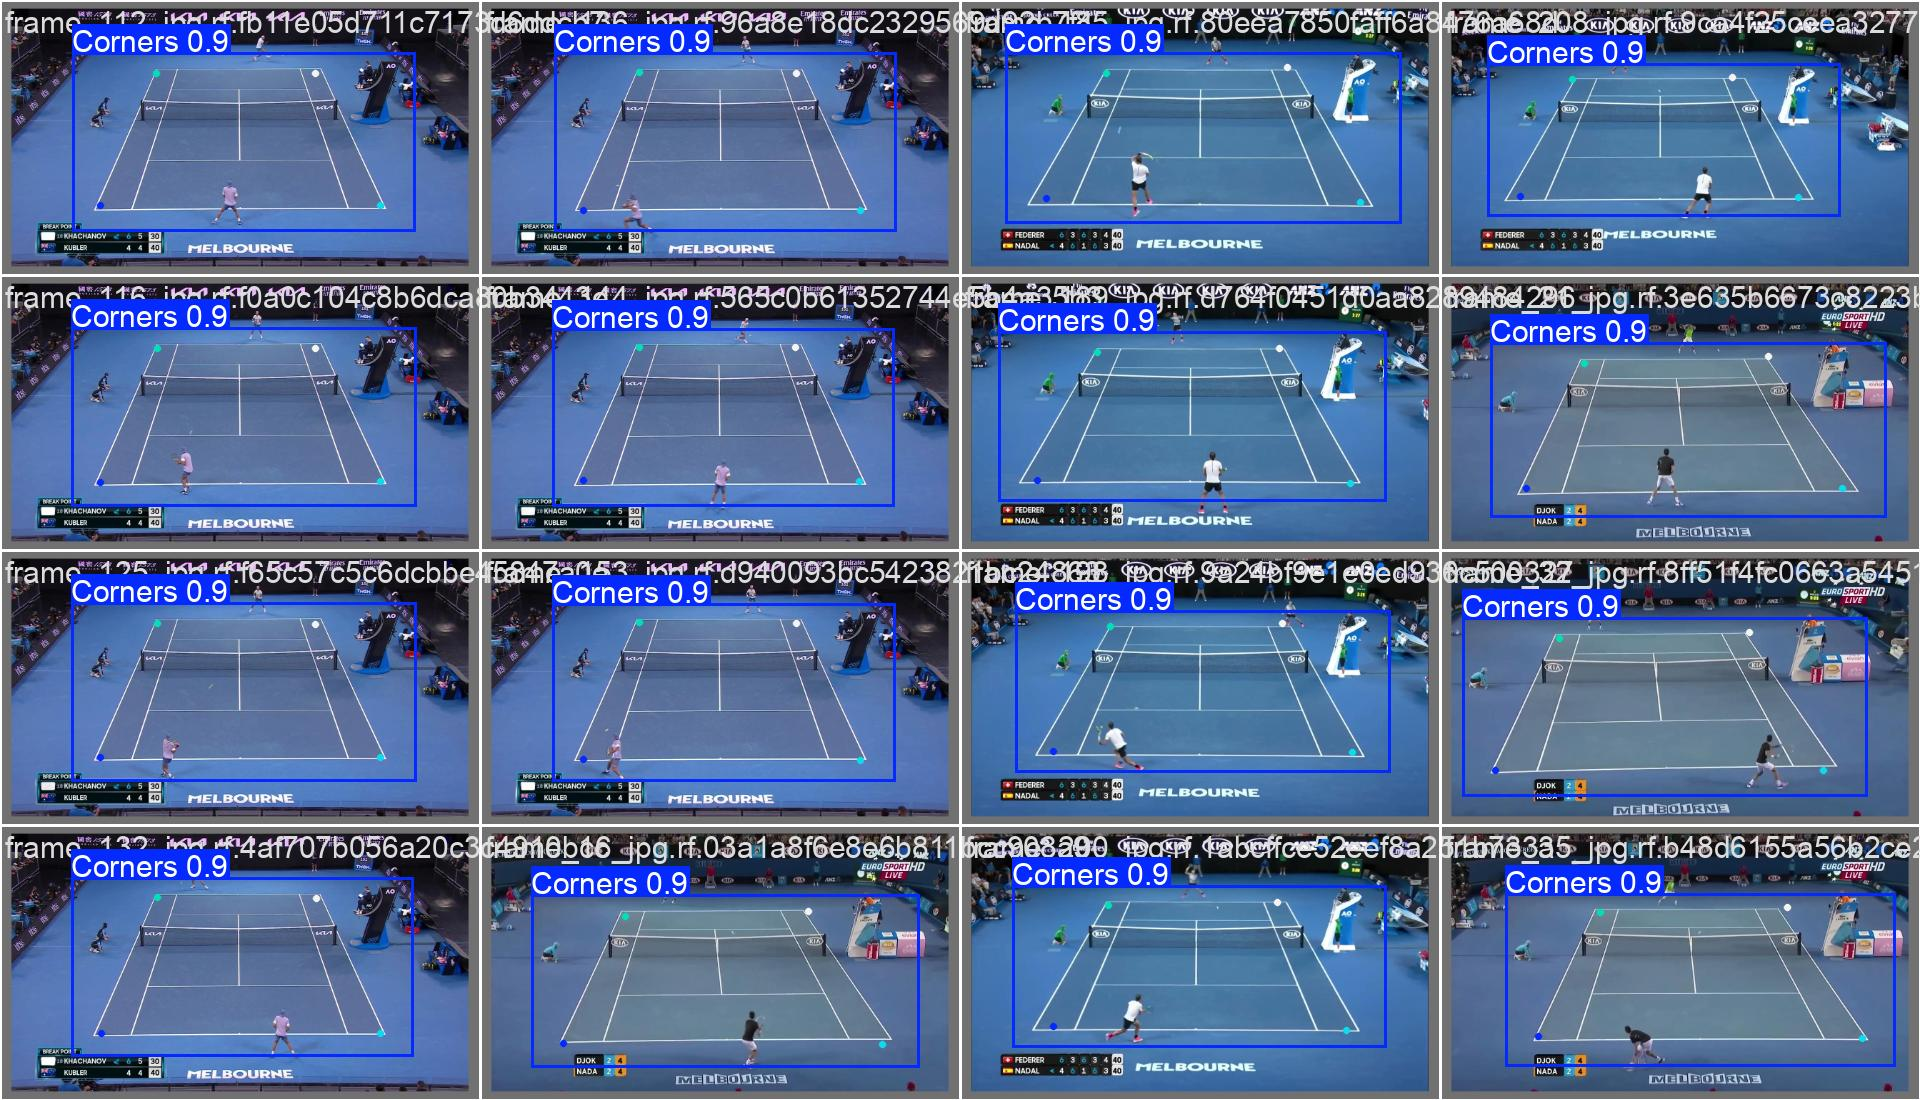

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train3/val_batch0_pred.jpg')

In [24]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train3/weights/best.pt data=/content/drive/MyDrive/adl-tennis-copy/roboflow_ds/data.yaml

/content
Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 305 layers, 62,924,727 parameters, 0 gradients, 232.5 GFLOPs
val: Scanning /content/drive/MyDrive/adl-tennis-copy/roboflow_ds/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.08s/it]
                   all         19         19      0.997          1      0.995      0.932      0.997          1      0.995      0.995
Speed: 0.2ms preprocess, 53.5ms inference, 0.0ms loss, 31.7ms postprocess per image
Results saved to runs/pose/val
💡 Learn more at https://docs.ultralytics.com/modes/val
